##### import

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sources import Cfg
import nn_template.data_augmentation
import nn_template.datasets
import nn_template.hyperparameters_tuning.optuna
from nn_template.callbacks.log_artifacts import Export2DLabel

In [3]:
import matplotlib.pyplot as plt

### Load Dataset

In [4]:
cfg = Cfg.Parser('yaml-demos/demo.yaml').get_config()

In [5]:
train = cfg['datasets.train'].dataset()
validate = cfg['datasets.validate'].dataset()
test = cfg['datasets.test.DRIVE'].dataset()

In [6]:
%timeit train[1]
data = [train[1] for i in range(3)]

547 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
plt.rcParams["figure.figsize"] = (25, 25)

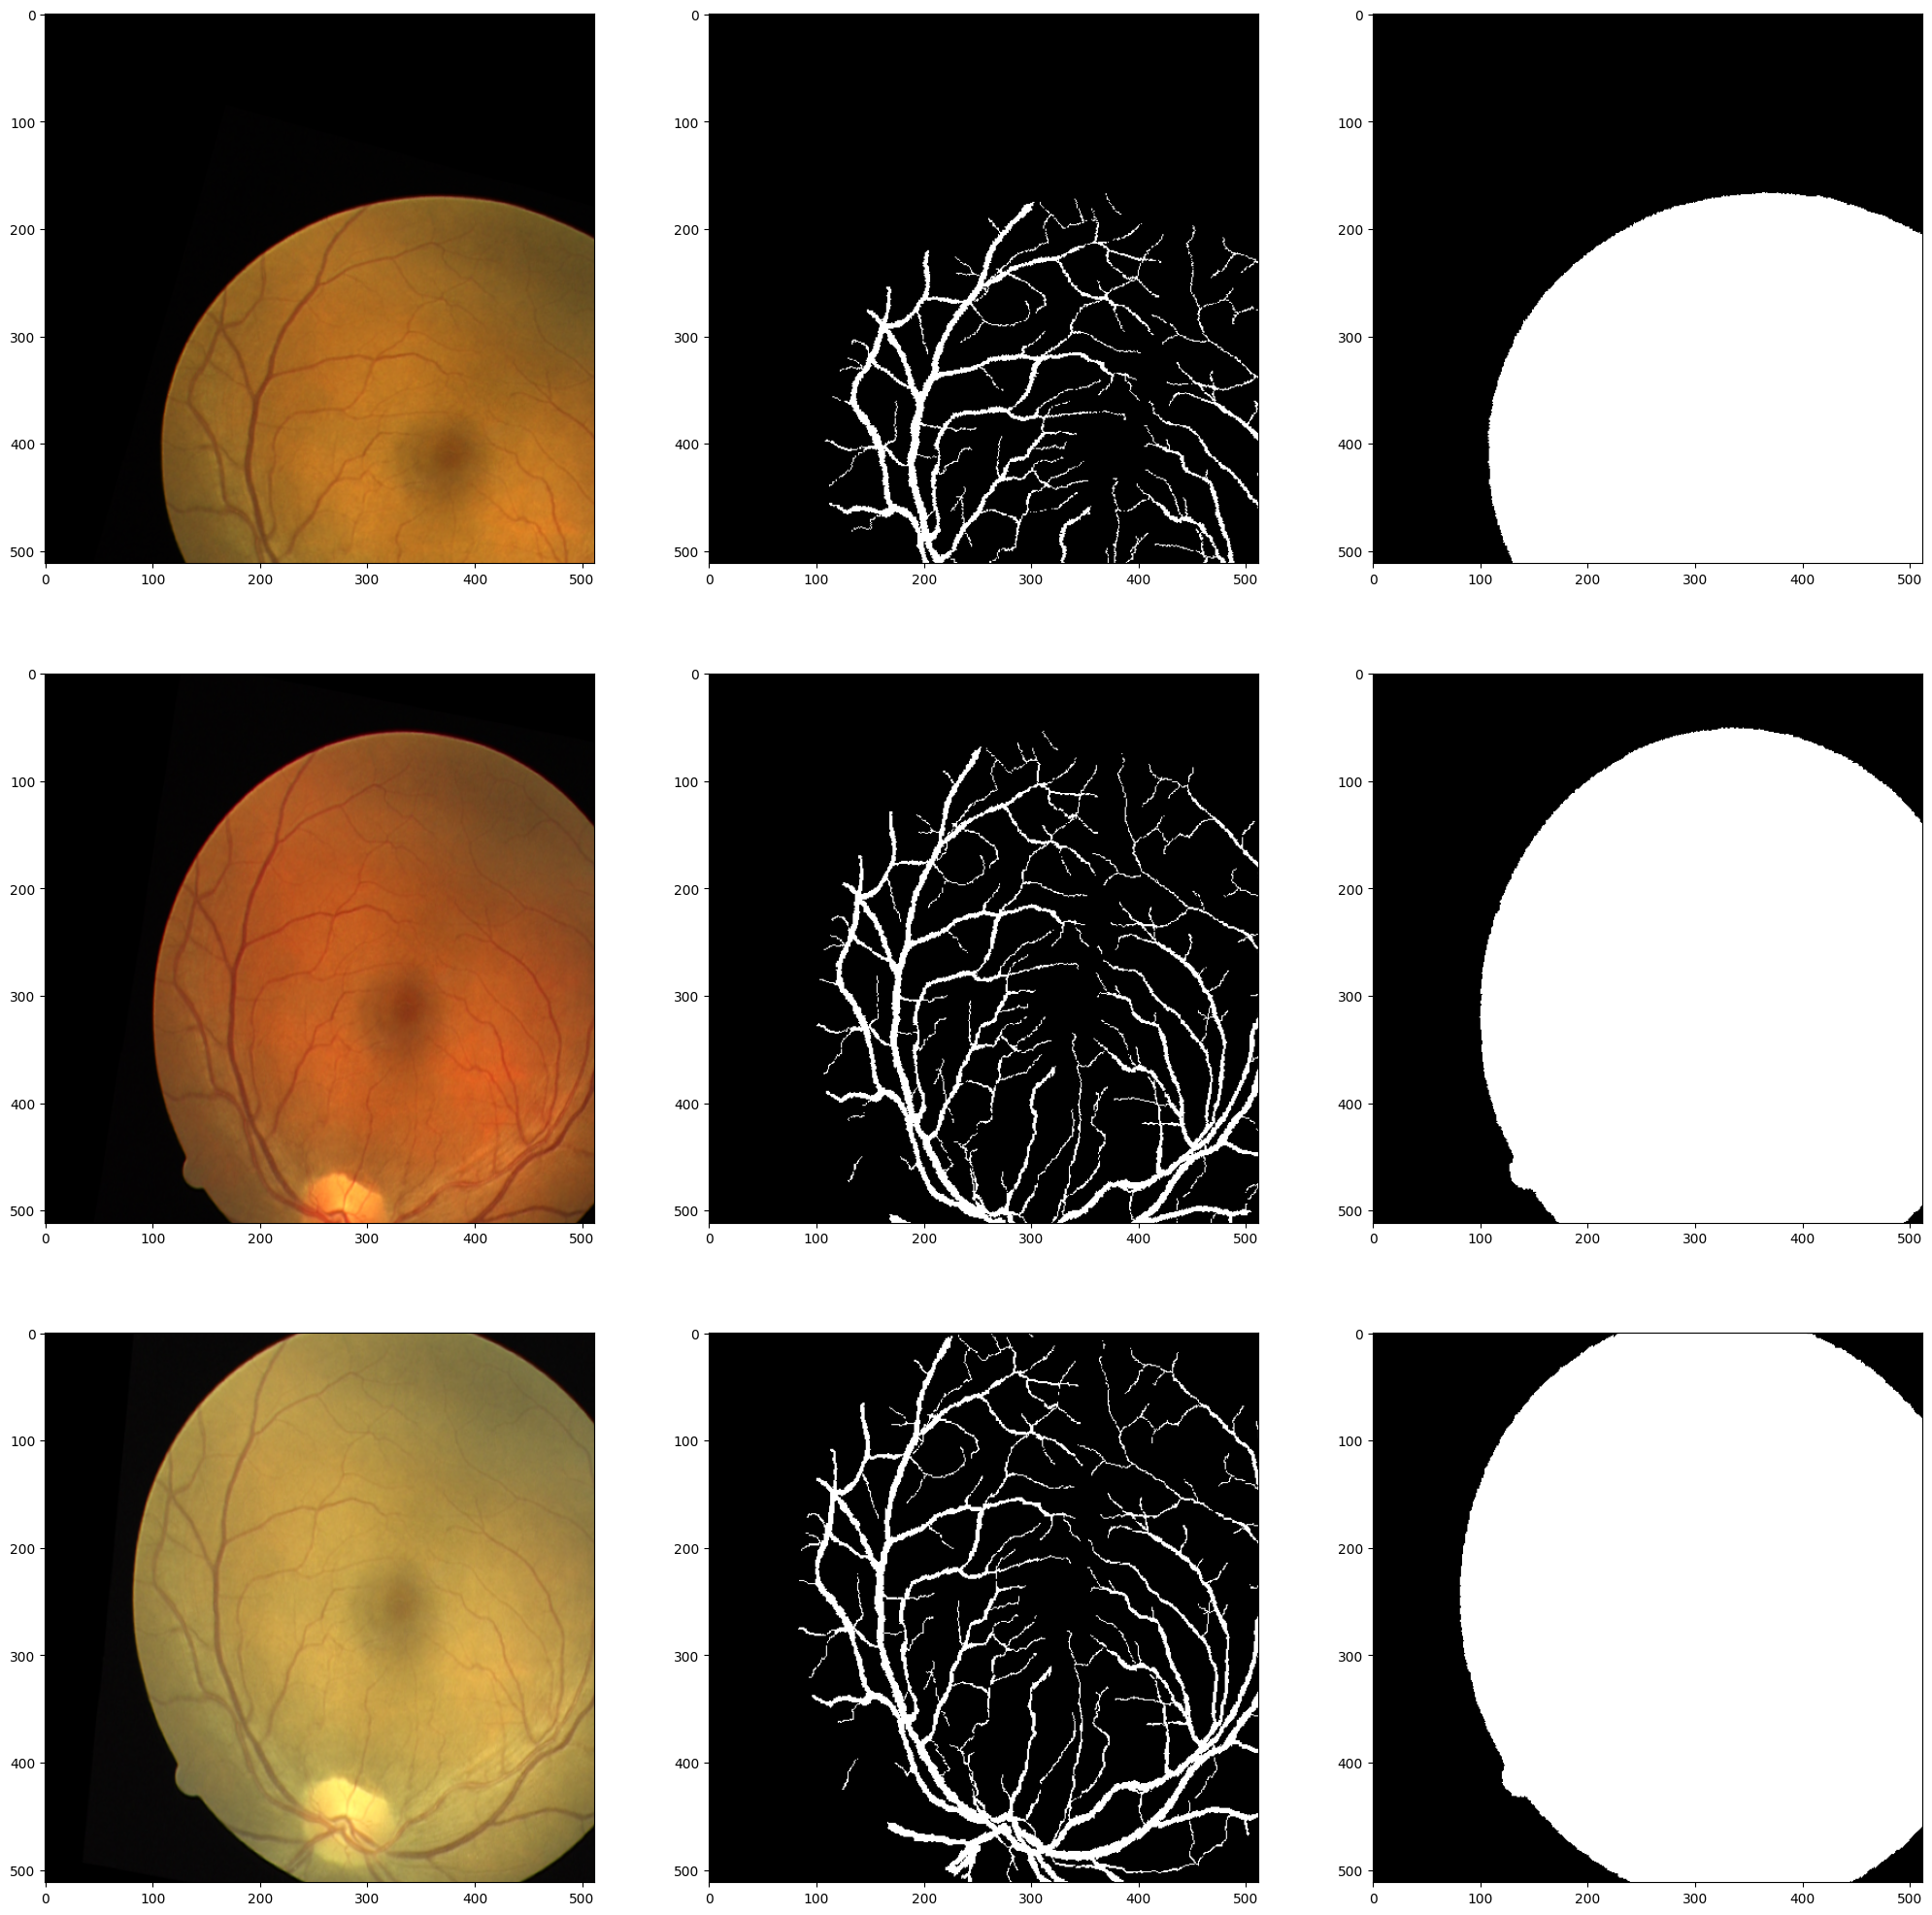

In [ ]:
fig, axs = plt.subplots(len(data),3)
for i, d in enumerate(data):
    axs[i, 0].imshow(d['x'].permute((1,2,0)).flip(2))
    axs[i, 1].imshow(d['y'], cmap='gray', vmax=1)
    axs[i, 2].imshow(d['mask'], cmap='gray')

## Test Dataloader

In [21]:
datasets = cfg['datasets']
train_dataloader, val_dataloader = datasets.create_train_val_dataloaders()
test_dataloader = datasets.create_test_dataloaders()

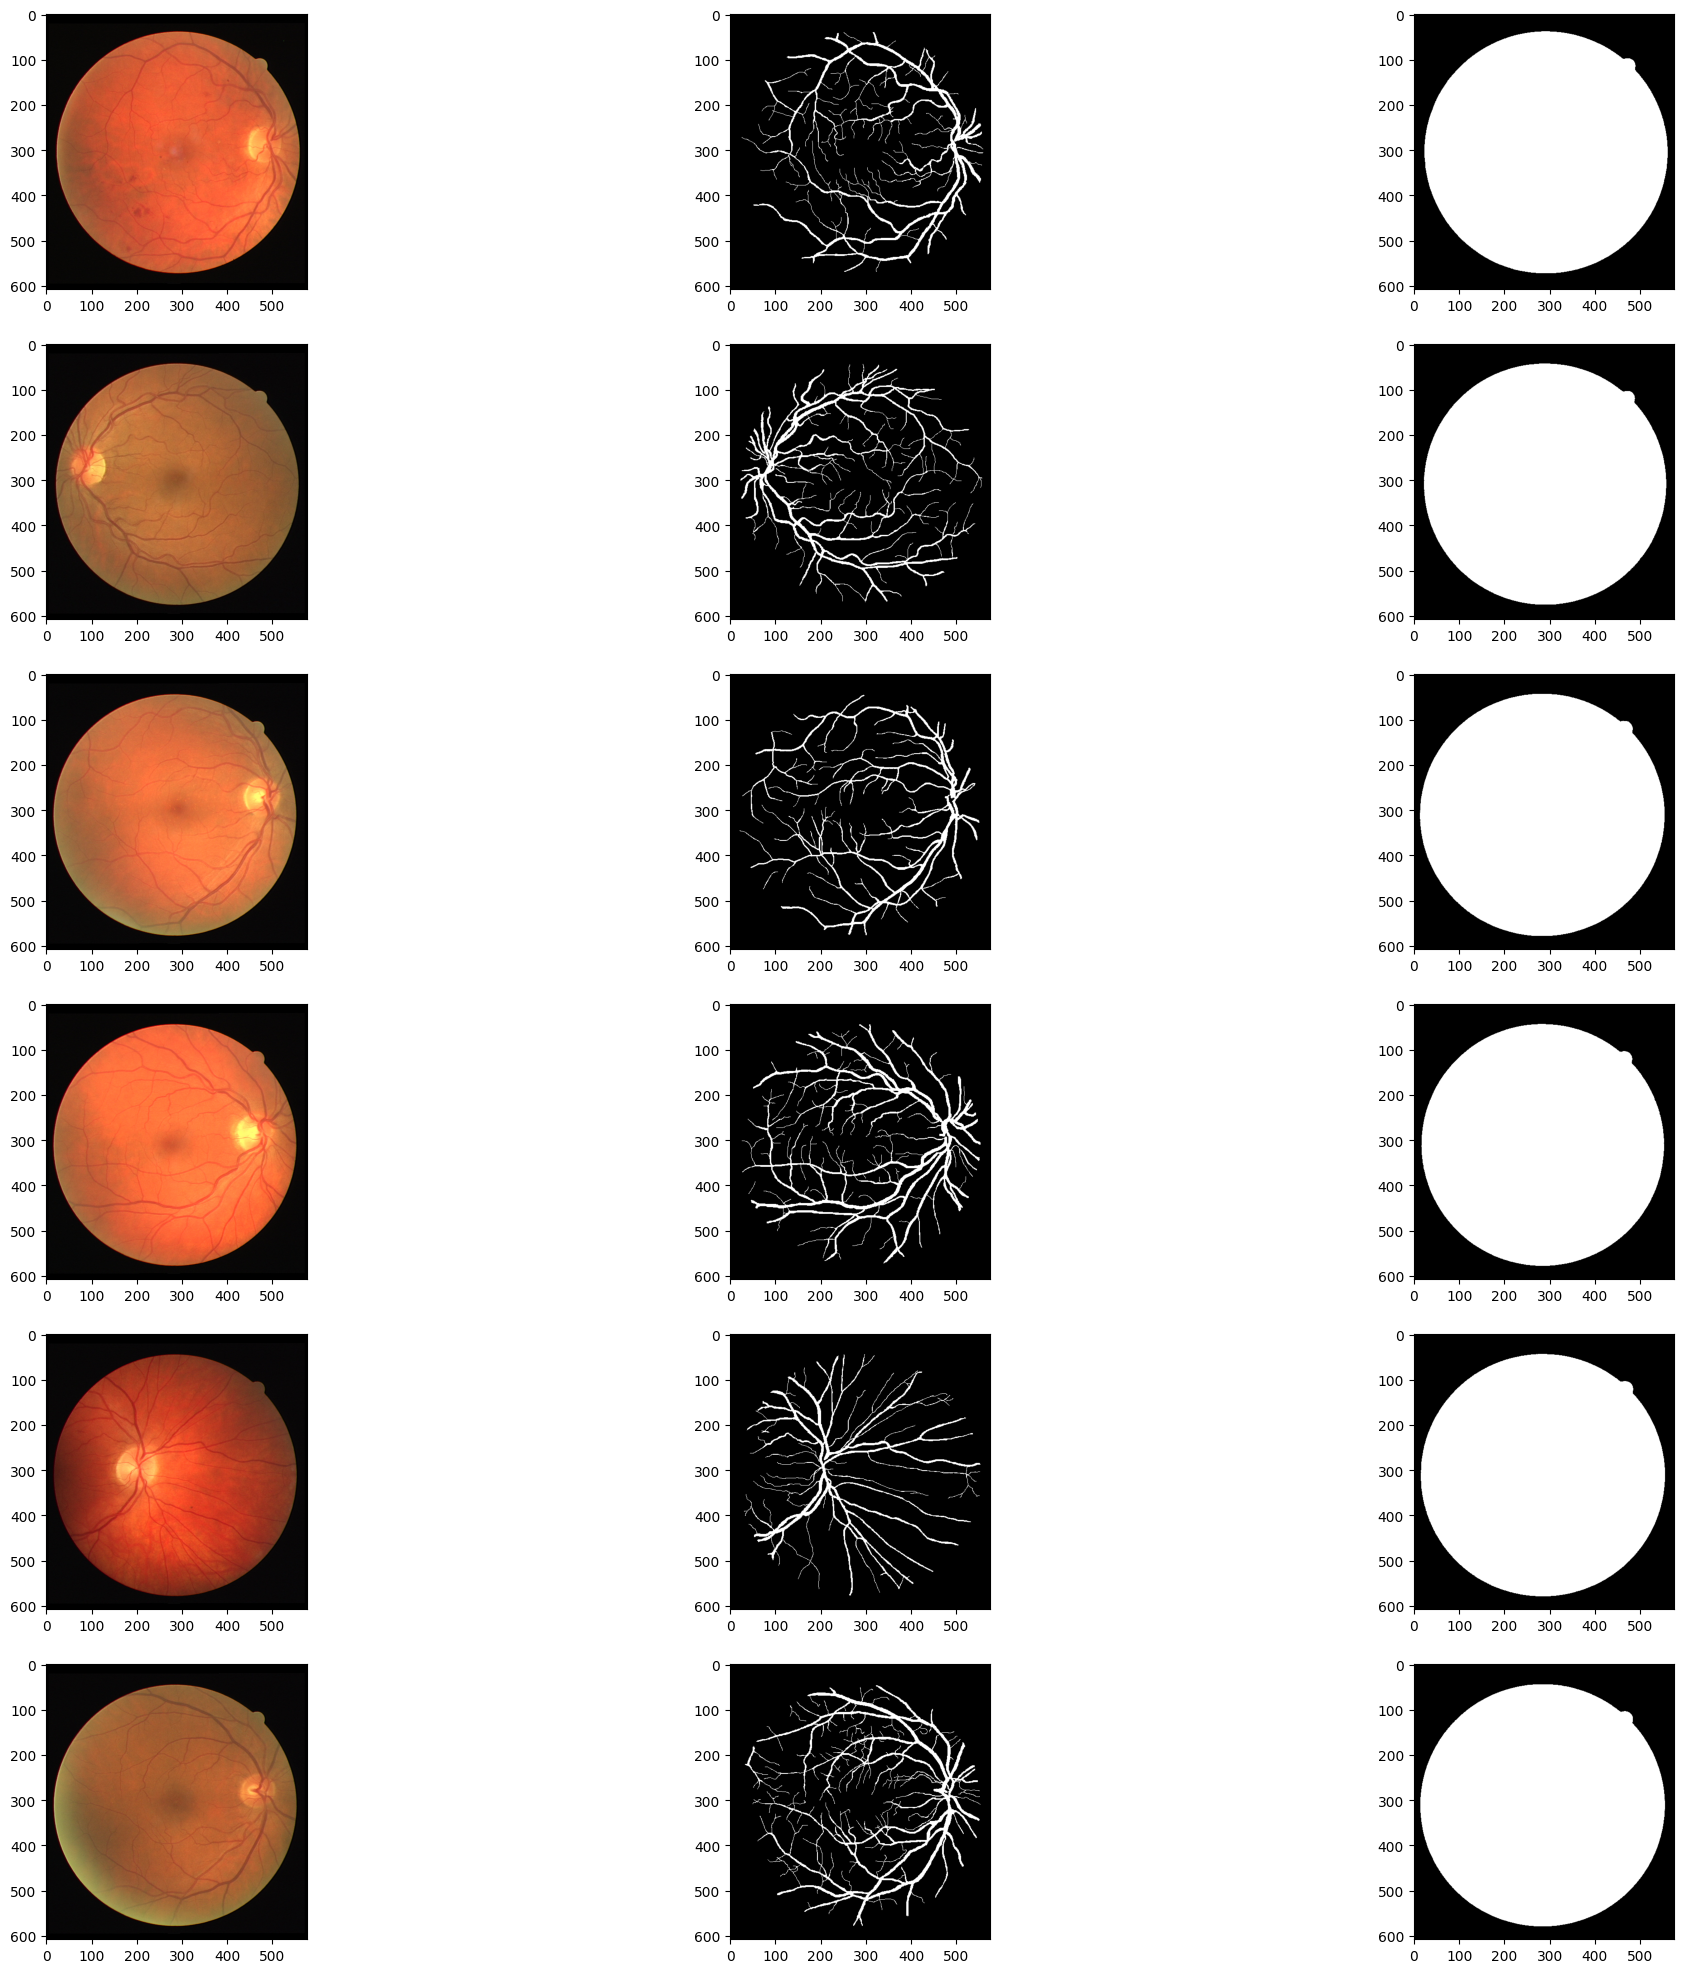

In [27]:
batch = next(iter(test_dataloader[0]))
fig, axs = plt.subplots(len(batch['x']),3)
for i, (x, y, mask) in enumerate(zip(*[batch[_] for _ in 'x y mask'.split()])):
    axs[i, 0].imshow(x.permute((1,2,0)).flip(2))
    axs[i, 1].imshow(y, cmap='gray', vmax=1)
    axs[i, 2].imshow(mask, cmap='gray')

In [28]:
cmap_vessel = {(0, 0): 'black', (1, 1): 'white', (1, 0): 'orange', (0, 1): 'greenyellow', 'default': 'lightgray'}
formatter = Export2DLabel(cmap_vessel)
formatter.format_batch(batch)

tensor([0, 1])